# Logistic Regression

Regression methods aren’t just for predicting continuous values—they can also be used for classification. The simplest example of this is **Logistic Regression**, where we train a linear model to separate two classes in feature space. The goal is for the model to output `1` if an input belongs to our target class and `0` otherwise.

The formula for logistic regression should look familiar if you’ve seen the post on Linear Regression:

$$
\hat{p} = \sigma(\theta^T \cdot x)
$$

We scale each input feature $x_i$ by a corresponding weight $\theta_i$, plus a bias term. The key difference here is that we apply a special function, $\sigma$, to the output. This is the **logistic function**, also called the **sigmoid function**, which maps the result to a probability (i.e., a value between 0 and 1):

$$
\sigma(t) = \frac{1}{1 + \exp(-t)}
$$

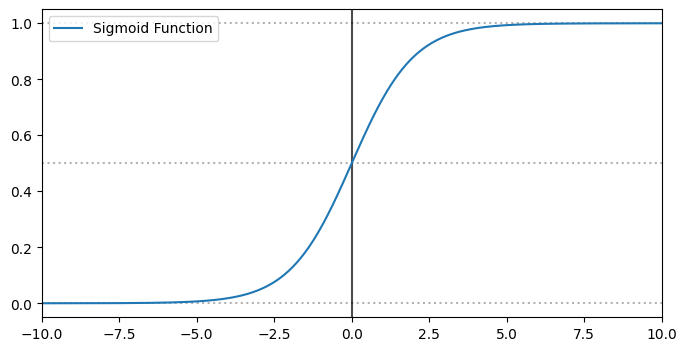

In [180]:
import numpy as np
import matplotlib.pyplot as plt

x_range = np.linspace(-10,10,1000)

def sigmoid(t):
    return 1/(1+ np.exp(-t))

plt.figure(figsize=(8,4))
plt.axvline(x=0, color='black', alpha=0.7, linestyle='-')  # Or any color/style you want
plt.axhline(y=0, color='black', alpha=0.3, linestyle=':')  # Or any color/style you want
plt.axhline(y=1, color='black', alpha=0.3, linestyle=':')  # Or any color/style you want
plt.axhline(y=0.5, color='black', alpha=0.3, linestyle=':')  # Or any color/style you want
plt.xlim(-10,10)
plt.plot(x_range, sigmoid(x_range), label="Sigmoid Function")
plt.legend()
plt.show()

The decision boundary lies at $0.5$. That means the predicted label $\hat{y}$ is `1` if $\hat{p} > 0.5$, and `0` otherwise.

---

## Training

To train a logistic regression model, we want it to output **high probabilities** for positive samples ($y = 1$) and **low probabilities** for negative samples ($y = 0$). The loss function for a single prediction looks like this:

$$
c(\theta) =
\begin{cases}
    -\log(\hat{p}) & \text{if } y = 1 \\ 
    -\log(1 - \hat{p}) & \text{if } y = 0
\end{cases}
$$

This can be combined into a single expression:

$$
c(\theta) = - \left( y \cdot \log(\hat{p}) + (1 - y) \cdot \log(1 - \hat{p}) \right)
$$

Unfortunately, there’s no closed-form solution for this cost function. However, the good news is that it’s **convex**, which means we can use **gradient descent** to find the global minimum.

The gradient of the cost function with respect to each parameter $\theta_j$ is:

$$
\frac{\partial}{\partial \theta_j} = \left( \sigma(\theta^T \cdot x) - y \right) \cdot x_j
$$

---

## In Practice

Let’s see how this works on a real dataset: the famous **Iris dataset** from `scikit-learn`. It contains features of 150 iris flowers across three species. We'll try to differentiate one species—**Iris Virginica**—from the others using logistic regression.

We’ll start by using only one feature: **petal width**.

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
X = iris["data"][:,3].reshape(-1,1)
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression()
log_reg.fit(X,y)

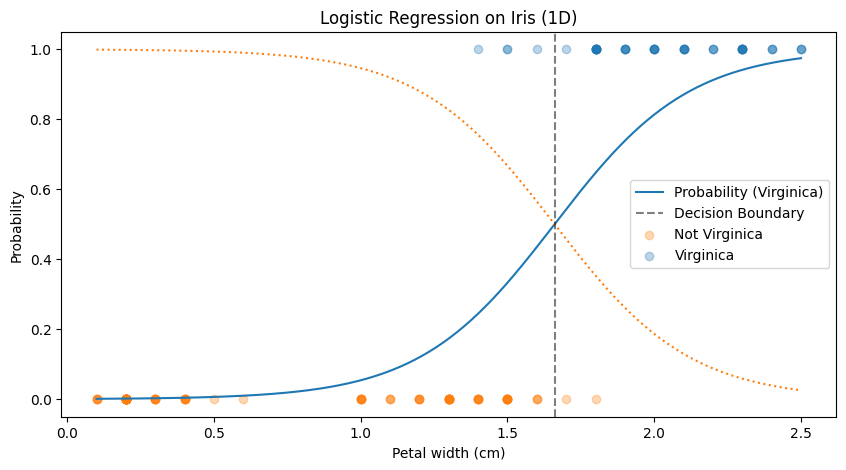

In [164]:
X_test = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_test)

plt.figure(figsize=(10,5))
plt.plot(X_test, y_prob[:, 1], label="Probability (Virginica)")
plt.plot(X_test, y_prob[:, 0], ":")
plt.axvline(log_reg.intercept_ / -log_reg.coef_[0], color="k", alpha=0.5, linestyle="--", label="Decision Boundary")

X_class0 = X[y == 0]
X_class1 = X[y == 1]
plt.scatter(X_class0, np.zeros(X_class0.shape[0]), c='tab:orange', label="Not Virginica", alpha=0.3,)
plt.scatter(X_class1, np.ones(X_class1.shape[0]), c='tab:blue', label="Virginica", alpha=0.3)

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.title("Logistic Regression on Iris (1D)")
plt.legend()
plt.show()

As petal width increases, the probability of the sample being Virginica also increases. The vertical dashed line shows the decision boundary. You can see how the model draws a clean line between the two classes based on this single feature.

---

Now let’s try using **two features**: petal width and petal length.

In [ ]:
X = iris["data"][:, [2, 3]] 
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression()
log_reg.fit(X, y)

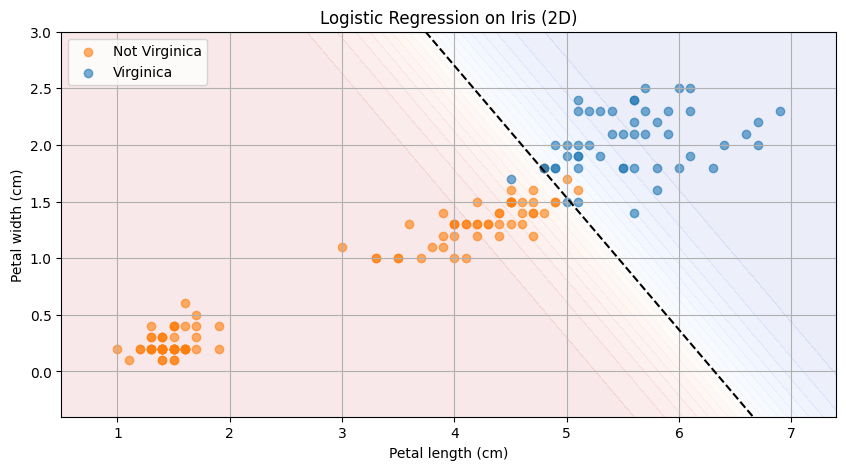

In [177]:
# Separate the two classes
X_class0 = X[y == 0]
X_class1 = X[y == 1]

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))


# Plotting
plt.figure(figsize=(10, 5))

# Contour plot for probability surface and decision boundary
plt.contourf(xx, yy, -probs, levels=20, cmap="coolwarm", alpha=0.1)
plt.contour(xx, yy, probs, levels=[0.5], colors='black', linestyles="--")

# Scatter plot for each class with labels
plt.scatter(X_class0[:, 0], X_class0[:, 1], c='tab:orange', label="Not Virginica", alpha=0.6,)
plt.scatter(X_class1[:, 0], X_class1[:, 1], c='tab:blue', label="Virginica", alpha=0.6)

# Labels and legend
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Logistic Regression on Iris (2D)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

This plot shows the samples based on their petal width and length. The dashed decision boundary separates the two classes. The closer a point is to the boundary, the more uncertain the prediction. You can also spot a few **misclassified samples**, where the model makes an incorrect prediction.

---

## Summary

Logistic Regression is a simple yet powerful method for binary classification. It models probabilities using the sigmoid function and is trained using a convex loss function, making optimization relatively straightforward with gradient descent.

It’s often a great starting point for classification problems—and as you've seen with the Iris dataset, it can be surprisingly effective even with just one or two features.